In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import DarkNews as dn
from nuflux import detgeo
# Our module
import nuflux
from nuflux import data
sys.path.append("/home/luc/Research/BIN_MC/nuflux/detector_geometries")
import helpers

In [6]:
def plotallthings():
    T1 = [[-231, 231,231,28,-28,-231,-231], [150,150,24,3,3,24,150]]

    ECAL1=[[-231, -231, 231, 231, -231],[150, 170, 170, 150, 150]]
    ECAL2 = [[231, 231, 251, 251, 231],[24, 170, 170, 26, 24]]
    ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

    HCAL1 = [[-251, -251, 251, 251, -251],[170, 348, 348, 170, 170]]
    HCAL2= [[251, 251, 418, 418,251, 251,251],[170, 348, 348, 43,26, 170,170]]
    HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

    SOLENOID =[[-418, -418, 418, 418, -418],[348, 446, 446, 348, 348]]

    MD1 = [[-418, -418, 418, 418, -418],[446, 645, 645, 446, 446]]
    MD2 = [[418, 418, 564, 564, 418],[43, 645, 645, 58, 43]]
    MD3 = [[-1 * i for i in MD2[0]], MD2[1]]

    CONE1 = [[28,564,564,28],[3,58,3,3]]
    CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

    BL = [[-564, -564, 564, 564, -564], [-3, 3, 3, -3, -3]]

    dets = [T1, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
    cols = ['lightgrey']*1 + ['dimgrey']*3 + ['grey']*3 + ['darkgrey'] + 3*['grey'] + ['black']*2 + ['white']
    plt.figure(figsize = (20,12))
    for i, det in enumerate(dets):
        plt.plot(det[0],det[1], color = cols[i])
        plt.fill_between(det[0], det[1], color = cols[i], alpha=0.7)
        new_y =[-1*k for k in det[1]]
        plt.plot(det[0], new_y, color = cols[i])
        plt.fill_between(det[0], new_y, color = cols[i], alpha=0.7)

    plt.plot([],[],color = 'black', label='Density: 19.28 g/cm**3 (W)')
    plt.plot([],[],color = 'dimgrey', label='Density: 9.3 g/cm**3 (W + Si)')
    plt.plot([],[],color = 'grey', label='Density: 7.874 g/cm**3 (Fe)')
    plt.plot([],[],color = 'darkgrey', label='Density: 2.7 g/cm**3 (Al)')
    plt.plot([],[],color = 'lightgrey', label='Density: 2.329 g/cm**3 (Si)')
    plt.plot([],[],color= 'white', label='Beamline Pipe')

    plt.xlabel("z-coordinate (cm)")
    plt.ylabel("r-coordinate (cm)")
    plt.legend(loc='lower right')

In [3]:
mdb = data.get_particles("mutristan_small")

In [4]:
old_m = mdb.pnumu_ar[:,1:4] # after initial rotation, no need to translate
old_m2 = mdb.pnue_ar[:,1:4]
po = mdb.pos_at.T #need to translate
old_p = np.copy(po)
old_p[:,2] = po[:,2] -3e5/2/np.pi

#needa change coordinates: x--> -x, y --> z, z --> y
mc = np.copy(old_m)
m2c = np.copy(old_m2)
pc = np.copy(old_p)

m = np.empty(mc.shape)
m2 = np.empty(m2c.shape)
p = np.empty(old_p.shape)

old = [mc, m2c, pc]
new = [m, m2, p]
for i, coord in enumerate(new):
    coord[:,0] = -1 * old[i][:,0]
    coord[:,1] = old[i][:,2]
    coord[:,2] = old[i][:, 1]


In [5]:
geom = "approximate_muon_detector_1"
sim = detgeo.SimulateDetector(dec_pos = p, momenta = m, E = mdb.pnue_ar[:,0], weights = mdb.w, Geometry = geom, Nmu = 2.9e19, iterations = 25, particle = "nue").run()

/home/luc/Research/BIN_MC/nuflux/detector_geometries/helpers.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  roots[i,:] = root# (indices size, 2) THIS MIGHT NOT ALWAYS have size two


In [7]:
sim.total_count

7887950666.656478

Text(0.5, 1.0, 'Approx Muon Detector 1: intersection points')

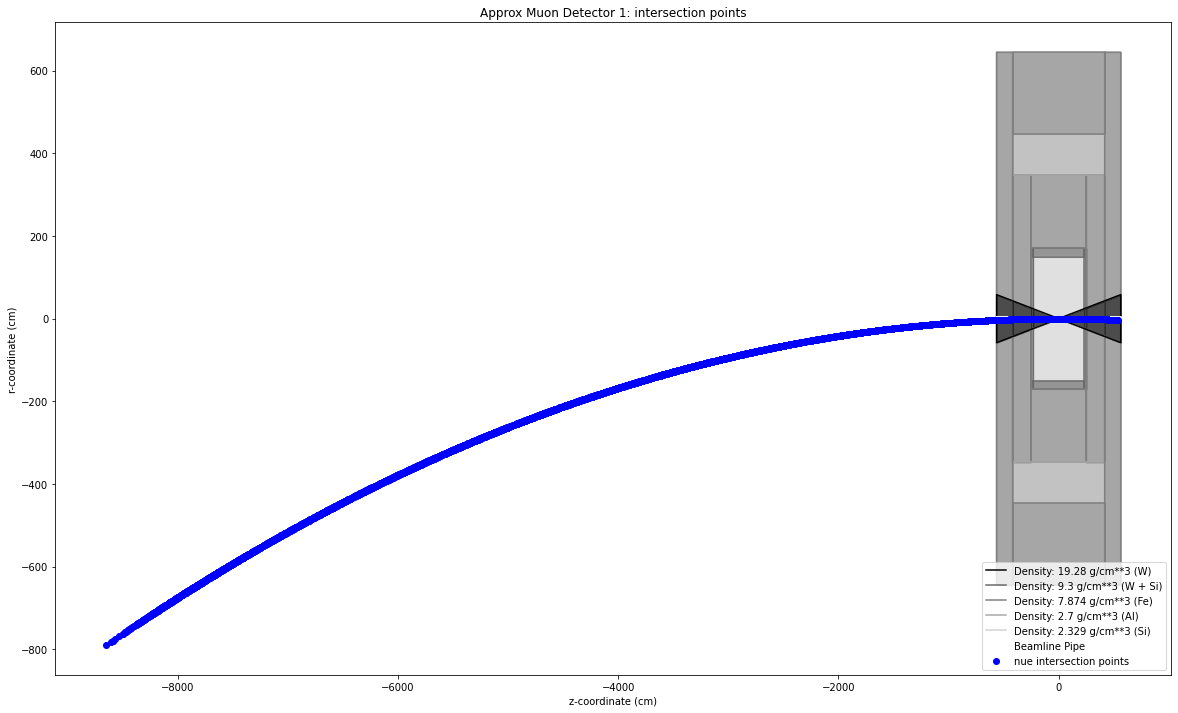

In [14]:
# intersection points?
plotallthings()
particle = -1
arr = sim.intersection_points[sim.mask]
#arr2 = sim2.intersection_points[sim2.mask]
#plt.scatter(arr[particle, :,2], np.sqrt(arr[particle,:,1]**2 + arr[particle, :, 0]**2), alpha = 1, zorder = 10)

plt.scatter(arr[:, :1,2], arr[:,:1,1], alpha = 1, zorder = 10, c = 'blue', label ='nue intersection points')
#plt.scatter(arr2[:, :1,2], arr2[:,:1,1], alpha = 1, zorder = 10,c ='red', label = 'numu intersection points')
'''plt.xlim(-564, right=564)
plt.ylim(-648, 648)'''
plt.legend(loc ='lower right')
plt.title("Approx Muon Detector 1: intersection points")
#plt.savefig("plots_Luc/approx_detector_1_intersection_points.jpg", bbox_inches='tight', dpi=300)